

# 0. Configuration 

In [39]:
!pip install textblob
!pip install googlemaps
!pip install spacy
!pip install nltk
!pip install transformers 
!pip install pycorenlp
!pip install flair
!pip install torch torchvision
!pip install torch spacytextblob
!pip install pandas
!pip install seaborn
!pip install matplotlib
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 2.2 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/12.8 MB 10.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 13.9 MB/s eta 0:00:01
     -------- ------------------------------- 2.7/12.8 MB 15.9 MB/s eta 0:00:01
     ------------ --------------------------- 3.9/12.8 MB 17.7 MB/s eta 0:00:01
     -------------- ------------------------- 4.8/12.8 MB 17.9 MB/s eta 0:00:01
     ----------------- ---------------------- 5.7/12.8 MB 18.2 MB/s eta 0:00:01
     -------------------- ------------------- 6.7/12.8 MB 18.6 MB/s eta 0:00:01
     ----------------------- ---------------- 7.7/12.8 MB 18.8 MB/s eta 0:00:01
     -------------------------- ------------- 8.5/12.8 MB 18.7 MB/s eta 0:00:01
     ----------------------------- ---------- 9.5/12.8 MB 19.0 MB/s eta 0:00:01
     ------------------------------- ------- 10.3


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. import reviews
### My Google API has expired, so I will just show you how to import the reviews; they will be imported manually.

In [40]:
# this part is a example
# import googlemaps

# # Initialize with your API key
# gmaps = googlemaps.Client(key='YOUR_API_KEY')

# # Place ID for the restaurant
# place_id = 'INSERT_PLACE_ID_HERE'

# # Fetch the place details
# place_result = gmaps.place(place_id=place_id)

# # Extract reviews
# reviews = place_result['result'].get('reviews', [])

# for review in reviews:
#     print(review['author_name'], review['rating'], review['text'])

In [41]:
reviews = [
    "Cette adresse propose une sélection remarquable de plats indiens authentiques, avec un personnel bienveillant et efficace. Les prix sont compétitifs, l'ambiance conviviale. Une expérience à renouveler pour les amateurs de cuisine indienne.",
    "Les Kulcha sont très bons! Les autres pas mal aussi.",
    "La nourriture était très bonne mais le service de la dernière fois était catastrophique, avec un personnel ne parlant pas français, contrairement à une visite précédente.",
    "Les ingrédients frais font la différence ici avec un service attentif. Agréablement surpris par la qualité de la nourriture et l'accueil.",
    "Une mauvaise expérience. Tous les plats étaient incroyablement salés, à l'exception du pain nan. Le service principalement en anglais et une ambiance gâchée par une musique trop forte et une grande télé.",
    "La nourriture est bonne et chaude, le menu diversifié et le personnel courtois. Recommandé pour un mélange d'ambiance 'fast food' et salle à manger traditionnelle.",
    "La nourriture est intéressante mais ultra piquante, même pour les options 'not spicy'. Le nan est excellent.",
    "Bonne bouffe, serveur souriant et bon service, malgré un manque de service en français et un temps d'attente long avec peu de clients.",
    "Le système de son était défectueux, musique très forte, commande incorrecte et excessive attente. La nourriture était brûlée et a fini à la poubelle.",
    "Les plats étaient délicieux et savoureux, beau choix de pains. La musique un peu forte mais service bilingue avec accueil et au revoir en français."
]

sentiments_humain = [
    "POSITIVE",  # Review 1 (Ratings: Cuisine 5, Service 5, Ambiance 5)
    "POSITIVE",  # Review 2 (Ratings: Cuisine 5, Service 4, Ambiance 4)
    "NEUTRAL",   # Review 3 (Ratings: Cuisine 5, Service 1, Ambiance 3)
    "POSITIVE",  # Review 4 (Ratings: Cuisine 5, Service 5, Ambiance 4)
    "NEGATIVE",  # Review 5 (Ratings: Cuisine 1, Service 1, Ambiance 2)
    "POSITIVE",  # Review 6 (No specific ratings but positive feedback)
    "POSITIVE",  # Review 7 (No specific ratings but feedback implies overall positive despite spicy food)
    "POSITIVE",  # Review 8 (Ratings: Cuisine 5, Service 4, Ambiance 4)
    "NEGATIVE",  # Review 9 (Ratings: Cuisine 1, Service 1, Ambiance 1)
    "POSITIVE"   # Review 10 (Ratings: Cuisine 5, Service 4, Ambiance 4)
]

___
___

# 2. Models

- textblob
- nltk
- spacy
- transformers
- flair


In [42]:
from textblob import TextBlob

# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'POSITIVE'
    elif analysis.sentiment.polarity < -0.1:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Analyzing each review
sentiments_textblob = []
for review in reviews:
    sentiment_textblob = get_sentiment(review)
    sentiments_textblob.append(sentiment_textblob)
    print(f"Review: {review[:60]}... | Sentiment: {sentiment_textblob}")

Review: Cette adresse propose une sélection remarquable de plats ind... | Sentiment: NEUTRAL
Review: Les Kulcha sont très bons! Les autres pas mal aussi.... | Sentiment: NEUTRAL
Review: La nourriture était très bonne mais le service de la dernièr... | Sentiment: NEUTRAL
Review: Les ingrédients frais font la différence ici avec un service... | Sentiment: NEUTRAL
Review: Une mauvaise expérience. Tous les plats étaient incroyableme... | Sentiment: NEUTRAL
Review: La nourriture est bonne et chaude, le menu diversifié et le ... | Sentiment: POSITIVE
Review: La nourriture est intéressante mais ultra piquante, même pou... | Sentiment: POSITIVE
Review: Bonne bouffe, serveur souriant et bon service, malgré un man... | Sentiment: NEUTRAL
Review: Le système de son était défectueux, musique très forte, comm... | Sentiment: NEGATIVE
Review: Les plats étaient délicieux et savoureux, beau choix de pain... | Sentiment: NEUTRAL


In [43]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')



# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyzing each review
sentiments_nltk = []
for review in reviews:
    scores = sia.polarity_scores(review)
    sentiment_nltk = 'POSITIVE' if scores['compound'] > 0.05 else 'NEGATIVE' if scores['compound'] < -0.05 else 'NEUTRAL'
    sentiments_nltk.append(sentiment_nltk)
    print(f"Review: {review[:60]}... | Sentiment: {sentiment_nltk}")

Review: Cette adresse propose une sélection remarquable de plats ind... | Sentiment: NEUTRAL
Review: Les Kulcha sont très bons! Les autres pas mal aussi.... | Sentiment: NEUTRAL
Review: La nourriture était très bonne mais le service de la dernièr... | Sentiment: NEUTRAL
Review: Les ingrédients frais font la différence ici avec un service... | Sentiment: NEUTRAL
Review: Une mauvaise expérience. Tous les plats étaient incroyableme... | Sentiment: NEGATIVE
Review: La nourriture est bonne et chaude, le menu diversifié et le ... | Sentiment: NEUTRAL
Review: La nourriture est intéressante mais ultra piquante, même pou... | Sentiment: POSITIVE
Review: Bonne bouffe, serveur souriant et bon service, malgré un man... | Sentiment: NEUTRAL
Review: Le système de son était défectueux, musique très forte, comm... | Sentiment: NEUTRAL
Review: Les plats étaient délicieux et savoureux, beau choix de pain... | Sentiment: NEGATIVE


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob



nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

sentiments_spacy = []
for review in reviews:
    doc = nlp(review)
    sentiment_spacy = 'POSITIVE' if doc._.polarity > 0.05 else 'NEGATIVE' if doc._.polarity < -0.05 else 'NEUTRAL'
    sentiments_spacy.append(sentiment_spacy)
    print(f"Review: {review[:60]}... | Sentiment: {sentiment_spacy}")

Review: Cette adresse propose une sélection remarquable de plats ind... | Sentiment: NEUTRAL
Review: Les Kulcha sont très bons! Les autres pas mal aussi.... | Sentiment: NEUTRAL
Review: La nourriture était très bonne mais le service de la dernièr... | Sentiment: NEUTRAL
Review: Les ingrédients frais font la différence ici avec un service... | Sentiment: NEUTRAL
Review: Une mauvaise expérience. Tous les plats étaient incroyableme... | Sentiment: NEUTRAL
Review: La nourriture est bonne et chaude, le menu diversifié et le ... | Sentiment: POSITIVE
Review: La nourriture est intéressante mais ultra piquante, même pou... | Sentiment: POSITIVE
Review: Bonne bouffe, serveur souriant et bon service, malgré un man... | Sentiment: NEUTRAL
Review: Le système de son était défectueux, musique très forte, comm... | Sentiment: NEGATIVE
Review: Les plats étaient délicieux et savoureux, beau choix de pain... | Sentiment: NEUTRAL


In [45]:
from transformers import pipeline
import torch

classifier = pipeline('sentiment-analysis')

sentiments_transformers = []
for review in reviews:
    result = classifier(review)
    sentiment_transformers = result[0]['label']
    sentiments_transformers.append(sentiment_transformers)
    print(f"Review: {review[:60]}... | Sentiment: {sentiment_transformers}")

Review: Cette adresse propose une sélection remarquable de plats ind... | Sentiment: POSITIVE
Review: Les Kulcha sont très bons! Les autres pas mal aussi.... | Sentiment: NEGATIVE
Review: La nourriture était très bonne mais le service de la dernièr... | Sentiment: NEGATIVE
Review: Les ingrédients frais font la différence ici avec un service... | Sentiment: NEGATIVE
Review: Une mauvaise expérience. Tous les plats étaient incroyableme... | Sentiment: POSITIVE
Review: La nourriture est bonne et chaude, le menu diversifié et le ... | Sentiment: POSITIVE
Review: La nourriture est intéressante mais ultra piquante, même pou... | Sentiment: POSITIVE
Review: Bonne bouffe, serveur souriant et bon service, malgré un man... | Sentiment: POSITIVE
Review: Le système de son était défectueux, musique très forte, comm... | Sentiment: NEGATIVE
Review: Les plats étaient délicieux et savoureux, beau choix de pain... | Sentiment: POSITIVE


In [46]:
from flair.models import TextClassifier
from flair.data import Sentence
import torch

classifier = TextClassifier.load('en-sentiment')

sentiments_flair = []
for review in reviews:
    sentence = Sentence(review)
    classifier.predict(sentence)
    sentiment_flair = sentence.labels[0].value
    sentiments_flair.append(sentiment_flair)
    print(f"Review: {review[:60]}... | Sentiment: {sentiment_flair}")

Review: Cette adresse propose une sélection remarquable de plats ind... | Sentiment: POSITIVE
Review: Les Kulcha sont très bons! Les autres pas mal aussi.... | Sentiment: POSITIVE
Review: La nourriture était très bonne mais le service de la dernièr... | Sentiment: NEGATIVE
Review: Les ingrédients frais font la différence ici avec un service... | Sentiment: POSITIVE
Review: Une mauvaise expérience. Tous les plats étaient incroyableme... | Sentiment: POSITIVE
Review: La nourriture est bonne et chaude, le menu diversifié et le ... | Sentiment: POSITIVE
Review: La nourriture est intéressante mais ultra piquante, même pou... | Sentiment: POSITIVE
Review: Bonne bouffe, serveur souriant et bon service, malgré un man... | Sentiment: POSITIVE
Review: Le système de son était défectueux, musique très forte, comm... | Sentiment: NEGATIVE
Review: Les plats étaient délicieux et savoureux, beau choix de pain... | Sentiment: POSITIVE


___
___

# 3. Comparison of results

In [47]:
def calculate_accuracy(predicted, correct):
    correct_count = sum(1 for x, y in zip(predicted, correct) if x == y)
    total = len(correct)
    accuracy = correct_count / total
    return accuracy * 100

,Accuracy
textblob,40.0
nltk,30.0
spacy,40.0
transformers,60.0
flair,80.0


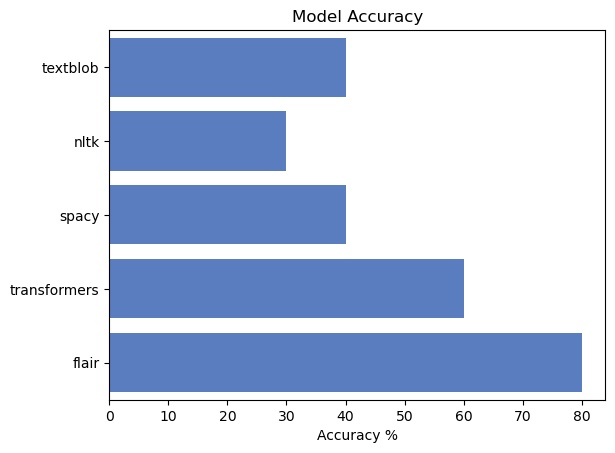

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Resultat for Visual Comparison
accu_dict = {}



# Append accuracy percentage for visual comparison
accu_dict["textblob"] = calculate_accuracy(sentiments_textblob, sentiments_humain)
accu_dict["nltk"] = calculate_accuracy(sentiments_nltk, sentiments_humain)
accu_dict["spacy"] = calculate_accuracy(sentiments_spacy, sentiments_humain)
accu_dict["transformers"] = calculate_accuracy(sentiments_transformers, sentiments_humain)
accu_dict["flair"] = calculate_accuracy(sentiments_flair, sentiments_humain)

df_accu = pd.DataFrame.from_dict(accu_dict, orient='index', columns=['Accuracy'])
display(df_accu)

sns.set_color_codes("muted")
sns.barplot(data=df_accu, x="Accuracy", y=df_accu.index, color="b")

plt.xlabel('Accuracy %')
plt.title('Model Accuracy')
plt.savefig('_AllAccuracy.png')
plt.show()